# Python Analyzer

<br>

---

<br>


## Reference

<br>

* 주피터 노트북의 단축기

    - 1. Command Mode ( press Esc to enable) 
        - 1. shift-Enter : run cell, select below
        - 2. Ctrl-Enter : run cell
        - 3. Alt-Enter : run cell, insert below 
        - 4. Y : to code 
        - 5. M : to markdown
        - 6. B : insert cell below
        - 7. X : cut selected cell
        - 8. C : copy selected cell
        - 9. Shift-V : paste cell above
        - 10. V : paste cell below
        - 11. Z : undo last cell deletion
        - 12. D,D : delete selected cell
        - 13. Shift-M : merge cell below

    - 2. Edit Mode ( press Enter to enable)
        - 1. Shift-Tab : 툴팁표시
        - 2. Ctrl-] : indent
        - 3. Ctrl-Shift- : split cell

<br>

* 주피터 노트북 마크다운 관련 참고 자료
    - 1. https://datanetworkanalysis.github.io/2019/10/12/markdown
    - 2. https://steemit.com/kr/@nand/markdown

<br>

* Pandas 데이터 분석
    - 1. https://stmorse.github.io/journal/tidyverse-style-pandas.html
    
<br>

* Python 통계 분석
    - 1. https://partrita.github.io/posts/pingouin/
    - 2. https://pingouin-stats.org/index.html
    - 3. https://www.marsja.se/repeated-measures-anova-in-r-and-python-afex-pingouin/

## Basic Setting & Package Install


* 경로 설정

In [1]:
import os
currDir = os.getcwd()
# os.chdir(r'/Users/deepmem/Desktop/working/aniFCnet/anime/results/an_01')
# os.chdir(r'/Users/deepmem/Desktop/working/aniFCnet/anime/results')
# os.chdir(r'/Users/deepmem/Desktop/working/aniFCnet/anime/results')
os.chdir(currDir)

* 패키지 설치

In [2]:
### Data Handling & Analysis
#!pip install numpy scipy pandas sympy statsmodels pingouin
#!conda install numpy scipy pandas sympy statsmodels pingouin

### Plot
#!pip install matplotlib seaborn plotnine bokeh
#!conda install matplotlib seaborn plotnine bokeh

### ML & DL
#!pip install scikit-learn tensorflow keras
#!conda install scikit-learn tensorflow keras

* 패키지 불러오기

In [3]:
# ---------------------------------------------------------------------------

# for Data Processing
import pandas as pd
import numpy as np

# ---------------------------------------------------------------------------

# for Plotting

## - matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl

## - seaborn
import seaborn as sns

## - plotnine
import plotnine as ggplot

# ---------------------------------------------------------------------------

# for Statistic

## scipy
from scipy import stats

## sympy
import sympy as sym

## statmodels
import statsmodels as modeling

## pingouin
import pingouin as pg

# ---------------------------------------------------------------------------

## for Machine Learning
import sklearn
from sklearn import preprocessing, feature_selection, linear_model, svm, metrics, model_selection

## for Deep Learning
# import tensorflow as tp
# import keras


# ---------------------------------------------------------------------------

# Reference

# ## - preprocessing
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import label_binarize

# ## - feature selection
# ## * https://scikit-learn.org/stable/modules/feature_selection.html
# ## * https://datascienceschool.net/03%20machine%20learning/14.03%20%ED%8A%B9%EC%A7%95%20%EC%84%A0%ED%83%9D.html
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import f_regression

# # ---------------------------------------------------------------------------

# ## - model
# ## * https://scikit-learn.org/stable/modules/linear_model.html
# from sklearn.linear_model import RidgeClassifier
# from sklearn.linear_model import LogisticRegression

# ## * https://scikit-learn.org/stable/modules/svm.html
# from sklearn import svm

# ## * https://xgboost.readthedocs.io/en/latest/
# from xgboost import XGBClassifier

# # ---------------------------------------------------------------------------

# ## - metric, performance measure
# ## * https://scikit-learn.org/stable/modules/model_evaluation.html
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix

# ## * https://scikit-learn.org/stable/auto_examples/model_selection/plot_permutation_tests_for_classification.html#sphx-glr-auto-examples-model-selection-plot-permutation-tests-for-classification-py
# from sklearn.model_selection import permutation_test_score

# # ---------------------------------------------------------------------------

# ## - model selection & evaluation
# ## * https://scikit-learn.org/stable/modules/cross_validation.html
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold, LeaveOneOut
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score #prediction
# from sklearn.model_selection import cross_val_predict #prediction
# from sklearn.model_selection import cross_validate #prediction

In [4]:

# Global setting
import warnings
warnings.filterwarnings('ignore')

sns.set_style('white')
%matplotlib inline


import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

font = {'weight' : 'bold',
        'size'   : 15}

mpl.rc('font', **font)

## Exploratory Data Analysis

### Data Load & Glimpse

In [5]:
data_dir =  ('%s/%s' % (currDir, 'Sample_Data'))
df = pd.read_csv(('%s/conSrep_lme.csv' % (data_dir)), encoding='euc-kr')

In [6]:
df.head(3)

,subj,roi,cond,ll,item,comp1,comp2,z,rd_ll,rd_cond,Zr_1,Zr_2,Zr_s,Zr_m,b_1,b_2,b_s,b_m,Zr_wm,b_wm
0,1,loc,1,1,10105,1,5,0.667815,0.783697,0.770063,0.241053,0.166046,0.203550,0.223921,0.126249,0.017386,0.071818,0.130898,NaN,NaN
1,1,loc,1,1,10107,1,7,0.873861,0.495769,0.486178,0.577057,0.279873,0.428465,0.468502,0.462390,-0.039847,0.211272,0.387839,NaN,NaN
2,1,loc,1,1,10111,1,11,0.893776,0.547011,0.549124,0.513251,0.342322,0.427786,0.518879,0.331198,0.136710,0.233954,0.481692,NaN,NaN


In [7]:
df.shape

(38016, 20)

In [8]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count')

,nan_count
subj,0
roi,0
cond,0
ll,0
item,0
comp1,0
comp2,0
z,0
rd_ll,0
rd_cond,0


In [9]:
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
subj,0.0
roi,0.0
cond,0.0
ll,0.0
item,0.0
comp1,0.0
comp2,0.0
z,0.0
rd_ll,0.0
rd_cond,0.0


In [10]:
df['subj'].value_counts()

1     1584
2     1584
98    1584
97    1584
96    1584
94    1584
20    1584
19    1584
18    1584
17    1584
16    1584
13    1584
15    1584
14    1584
12    1584
11    1584
10    1584
9     1584
8     1584
7     1584
6     1584
5     1584
3     1584
99    1584
Name: subj, dtype: int64

In [11]:
df['roi'].unique()

array(['loc', 'lloc', 'rloc', 'pf', 'lpf', 'rpf', 'bhpp', 'lhpp', 'rhpp',
       'a_hpp', 'p_hpp', 'mpfc'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38016 entries, 0 to 38015
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   subj     38016 non-null  int64  
 1   roi      38016 non-null  object 
 2   cond     38016 non-null  int64  
 3   ll       38016 non-null  int64  
 4   item     38016 non-null  int64  
 5   comp1    38016 non-null  int64  
 6   comp2    38016 non-null  int64  
 7   z        38016 non-null  float64
 8   rd_ll    38016 non-null  float64
 9   rd_cond  38016 non-null  float64
 10  Zr_1     38016 non-null  float64
 11  Zr_2     38016 non-null  float64
 12  Zr_s     38016 non-null  float64
 13  Zr_m     38016 non-null  float64
 14  b_1      38016 non-null  float64
 15  b_2      38016 non-null  float64
 16  b_s      38016 non-null  float64
 17  b_m      38016 non-null  float64
 18  Zr_wm    0 non-null      float64
 19  b_wm     0 non-null      float64
dtypes: float64(13), int64(6), object(1)
memory usage: 

In [13]:
# 범주형이지만 연속형(int64)으로 설정되어있는 경우 string으로 바꿔주기
df['subj']=df['subj'].astype(str)
df['cond']=df['cond'].astype(str)
df['ll']=df['ll'].astype(str)
df['item']=df['item'].astype(str)
df['comp1']=df['comp1'].astype(str)
df['comp2']=df['comp2'].astype(str)
df.dtypes 

subj        object
roi         object
cond        object
ll          object
item        object
comp1       object
comp2       object
z          float64
rd_ll      float64
rd_cond    float64
Zr_1       float64
Zr_2       float64
Zr_s       float64
Zr_m       float64
b_1        float64
b_2        float64
b_s        float64
b_m        float64
Zr_wm      float64
b_wm       float64
dtype: object

### Preprocessing

* **tidyverse style pandas**
    * **tidyr - pandas**
        * mutate - assign
        * select - filter
        * rename - rename
        * filter - query
        * arrange - sort_values
        * group_by - groupby
        * summarize - agg
        * gather - melt
        * spread - pivot

In [14]:
df.describe(include='all')

,subj,roi,cond,ll,item,comp1,comp2,z,rd_ll,rd_cond,Zr_1,Zr_2,Zr_s,Zr_m,b_1,b_2,b_s,b_m,Zr_wm,b_wm
count,38016,38016,38016,38016,38016,38016,38016,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,38016.000000,0.0,0.0
unique,24,12,2,4,264,19,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,loc,1,1,20203,1,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1584,3168,19008,9504,216,6312,4056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.268370,0.890519,0.891206,0.077718,0.077431,0.077574,0.096636,0.046737,0.046192,0.046465,0.095144,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633812,0.144079,0.142009,0.210166,0.210233,0.178061,0.223164,0.159033,0.162393,0.112774,0.229099,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.375781,0.275210,0.295550,-1.166095,-1.129066,-0.895102,-1.154292,-1.015663,-1.378982,-0.683348,-1.369066,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.093046,0.843164,0.846574,-0.051240,-0.051194,-0.030740,-0.041172,-0.047971,-0.047607,-0.022167,-0.044297,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206467,0.941848,0.944719,0.057624,0.055460,0.050731,0.067215,0.037029,0.036473,0.034590,0.070366,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574504,0.983062,0.982577,0.185612,0.186247,0.159385,0.208060,0.129384,0.129994,0.104299,0.211549,NaN,NaN


In [15]:
df2 = (df
 .filter(['subj', 'roi', 'cond', 'item', 'z', 'b_m', 'rd_ll'])
 .query('roi == "loc" | roi == "pf"')
 .rename(columns={'subj':'sn', 'cond':'con', 'z':'Z', 'b_m':'beta', 'rd_ll':'Zr_n'}))
df2['con'] = df2['con'].replace(['1','2'], ['cons','imm'])

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6336 entries, 0 to 36959
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sn      6336 non-null   object 
 1   roi     6336 non-null   object 
 2   con     6336 non-null   object 
 3   item    6336 non-null   object 
 4   Z       6336 non-null   float64
 5   beta    6336 non-null   float64
 6   Zr_n    6336 non-null   float64
dtypes: float64(3), object(4)
memory usage: 396.0+ KB


#### Long Format

In [17]:
Z_long = (df2
          .filter(['sn', 'roi', 'con', 'Z'])
          .groupby(['sn', 'roi', 'con'])
          .agg({'Z': ['mean', 'std', 'count']}))

beta_long = (df2
             .filter(['sn', 'roi', 'con', 'beta'])
             .groupby(['sn', 'roi', 'con'])
             .agg({'beta': ['mean', 'std', 'count']}))

Zr_long = (df2
           .filter(['sn', 'roi', 'con', 'Zr_n'])
           .assign(Zr=lambda x: 1-x.Zr_n)
           .filter(['sn', 'roi', 'con', 'Zr'])
           .groupby(['sn', 'roi', 'con'])
           .agg({'Zr': ['mean', 'std', 'count']}))

In [18]:
print(Z_long.head(4))
print(beta_long.head(4))
print(Zr_long.head(4))

                    Z                
                 mean       std count
sn roi con                           
1  loc cons  1.085557  0.591436    66
       imm   0.895288  0.540499    66
   pf  cons  0.406269  0.351890    66
       imm   0.324837  0.348329    66
                 beta                
                 mean       std count
sn roi con                           
1  loc cons  0.394441  0.261579    66
       imm   0.288257  0.251469    66
   pf  cons  0.079983  0.161896    66
       imm   0.074869  0.179356    66
                   Zr                
                 mean       std count
sn roi con                           
1  loc cons  0.441953  0.091241    66
       imm   0.379559  0.099872    66
   pf  cons  0.122856  0.070878    66
       imm   0.105637  0.067683    66


#### Wide Format

In [19]:
Z_wide = (Z_long['Z'].reset_index()
 .filter(['sn','roi', 'con', 'mean'])
 .rename(columns={'mean':'Z'})
 .pivot(index=['sn','roi'], columns='con', values='Z'))

beta_wide = (beta_long['beta'].reset_index()
 .filter(['sn','roi', 'con', 'mean'])
 .rename(columns={'mean':'beta'})
 .pivot(index=['sn','roi'], columns='con', values='beta'))

Zr_wide = (Zr_long['Zr'].reset_index()
 .filter(['sn','roi', 'con', 'mean'])
 .rename(columns={'mean':'Zr'})
 .pivot(index=['sn','roi'], columns='con', values='Zr'))


In [20]:
print(Z_wide.head(4))
print(beta_wide.head(4))
print(Zr_wide.head(4))

con         cons       imm
sn roi                    
1  loc  1.085557  0.895288
   pf   0.406269  0.324837
10 loc  0.455391  0.460376
   pf   0.220089  0.291423
con         cons       imm
sn roi                    
1  loc  0.394441  0.288257
   pf   0.079983  0.074869
10 loc  0.124292  0.134956
   pf   0.041539  0.070503
con         cons       imm
sn roi                    
1  loc  0.441953  0.379559
   pf   0.122856  0.105637
10 loc  0.162410  0.146782
   pf   0.070441  0.061856


#### Outlier Handling

In [21]:
df2_Z = (df2
         .filter(['sn', 'roi', 'con', 'Z']))
df2_beta = (df2
         .filter(['sn', 'roi', 'con', 'beta']))
df2_Zr = (df2
          .filter(['sn', 'roi', 'con', 'Zr_n'])
          .assign(Zr=lambda x: 1-x.Zr_n)
          .filter(['sn','roi','con','Zr']))

In [22]:
print(df2_Z.head(2))
print(df2_beta.head(2))
print(df2_Zr.head(2))

  sn  roi   con         Z
0  1  loc  cons  0.667815
1  1  loc  cons  0.873861
  sn  roi   con      beta
0  1  loc  cons  0.130898
1  1  loc  cons  0.387839
  sn  roi   con        Zr
0  1  loc  cons  0.216303
1  1  loc  cons  0.504231


In [23]:
# df2_Z_outliers = (df2_Z
#                   .groupby(['sn','roi'])
#                   .Z.transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(0))
df2_Z_outliers = (df2_Z
                  .groupby(['sn','roi'])
                  .Z.transform(lambda x : (x<np.mean(x)+np.std(x)*2)&(x>np.mean(x)-np.std(x)*2)).eq(0))

df2_Z_outliers = df2_Z_outliers.to_frame().rename(columns={'Z':'out'})
df2_Z = pd.concat([df2_Z, df2_Z_outliers], axis=1)

# df2_beta_outliers = (df2_beta
#                      .groupby(['sn','roi'])
#                      .beta.transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(0))
df2_beta_outliers = (df2_beta
                  .groupby(['sn','roi'])
                  .beta.transform(lambda x : (x<np.mean(x)+np.std(x)*2)&(x>np.mean(x)-np.std(x)*2)).eq(0))

df2_beta_outliers = df2_beta_outliers.to_frame().rename(columns={'beta':'out'})
df2_beta = pd.concat([df2_beta, df2_beta_outliers], axis=1)

# df2_Zr_outliers = (df2_Zr
#                    .groupby(['sn','roi'])
#                    .Zr.transform(lambda x : (x<x.quantile(0.95))&(x>(x.quantile(0.05)))).eq(0))
df2_Zr_outliers = (df2_Zr
                  .groupby(['sn','roi'])
                  .Zr.transform(lambda x : (x<np.mean(x)+np.std(x)*2)&(x>np.mean(x)-np.std(x)*2)).eq(0))

df2_Zr_outliers = df2_Zr_outliers.to_frame().rename(columns={'Zr':'out'})
df2_Zr = pd.concat([df2_Zr, df2_Zr_outliers], axis=1)

In [24]:
print('*Z\n',df2_Z.out.value_counts())
print('*beta\n',df2_beta.out.value_counts())
print('*Zr\n',df2_Zr.out.value_counts())

*Z
 False    6036
True      300
Name: out, dtype: int64
*beta
 False    6012
True      324
Name: out, dtype: int64
*Zr
 False    6058
True      278
Name: out, dtype: int64


In [25]:
Z_long = (df2_Z
          .filter(['sn', 'roi', 'con', 'Z'])
          .groupby(['sn', 'roi', 'con'])
          .agg({'Z': ['mean', 'std', 'count']}))

beta_long = (df2_beta
             .filter(['sn', 'roi', 'con', 'beta'])
             .groupby(['sn', 'roi', 'con'])
             .agg({'beta': ['mean', 'std', 'count']}))

Zr_long = (df2_Zr
           .filter(['sn', 'roi', 'con', 'Zr'])
           .groupby(['sn', 'roi', 'con'])
           .agg({'Zr': ['mean', 'std', 'count']}))

### Summarize

#### Activation

In [26]:
Z_G = (Z_long['Z'].reset_index()
       .filter(['sn', 'roi', 'con', 'mean'])
       .rename(columns={'mean': 'Z'})
       .groupby(['roi', 'con'])
       .agg({'Z': ['mean', 'std', 'sem']}))

Z_long_cons = (Z_long['Z'].reset_index()
               .filter(['sn', 'roi', 'con', 'mean'])
               .rename(columns={'mean': 'Z'})
               .query('con =="cons"'))
Z_long_imm = (Z_long['Z'].reset_index()
              .filter(['sn', 'roi', 'con', 'mean'])
              .rename(columns={'mean': 'Z'})
              .query('con =="imm"'))

ci = pd.DataFrame([stats.t.interval(alpha=0.95,
                                    df=len(
                                        Z_long_cons[Z_long_cons['roi'] == 'loc'])-1,
                                    loc=np.mean(
                                        Z_long_cons[Z_long_cons['roi'] == 'loc'].Z),
                                    scale=stats.sem(Z_long_cons[Z_long_cons['roi'] == 'loc'].Z)),
                   stats.t.interval(alpha=0.95, df=len(Z_long_imm[Z_long_imm['roi'] == 'loc'])-1,
                                    loc=np.mean(
                                        Z_long_imm[Z_long_imm['roi'] == 'loc'].Z),
                                    scale=stats.sem(Z_long_imm[Z_long_imm['roi'] == 'loc'].Z)),
                   stats.t.interval(alpha=0.95,
                                    df=len(
                                        Z_long_cons[Z_long_cons['roi'] == 'pf'])-1,
                                    loc=np.mean(
                                        Z_long_cons[Z_long_cons['roi'] == 'pf'].Z),
                                    scale=stats.sem(Z_long_cons[Z_long_cons['roi'] == 'pf'].Z)),
                   stats.t.interval(alpha=0.95, df=len(Z_long_imm[Z_long_imm['roi'] == 'pf'])-1,
                                    loc=np.mean(
                                        Z_long_imm[Z_long_imm['roi'] == 'pf'].Z),
                                    scale=stats.sem(Z_long_imm[Z_long_imm['roi'] == 'pf'].Z))
                   ])

Z_G = pd.concat([Z_G.Z.reset_index(), ci], axis=1)  # column bind
Z_G = (Z_G
       .rename(columns={0: '95ci_hi', 1: '95ci_lo'}))
Z_G

,roi,con,mean,std,sem,95ci_hi,95ci_lo
0,loc,cons,0.744149,0.339561,0.069313,0.600765,0.887533
1,loc,imm,0.703449,0.343071,0.070029,0.558583,0.848315
2,pf,cons,0.247465,0.182439,0.037240,0.170428,0.324502
3,pf,imm,0.232592,0.189177,0.038616,0.152710,0.312475


#### Beta

In [27]:
beta_G = (beta_long['beta'].reset_index()
          .filter(['sn', 'roi', 'con', 'mean'])
          .rename(columns={'mean': 'beta'})
          .groupby(['roi', 'con'])
          .agg({'beta': ['mean', 'std', 'sem']}))

beta_long_cons = (beta_long['beta'].reset_index()
                  .filter(['sn', 'roi', 'con', 'mean'])
                  .rename(columns={'mean': 'beta'})
                  .query('con =="cons"'))
beta_long_imm = (beta_long['beta'].reset_index()
                 .filter(['sn', 'roi', 'con', 'mean'])
                 .rename(columns={'mean': 'beta'})
                 .query('con =="imm"'))

ci = pd.DataFrame([stats.t.interval(alpha=0.95,
                                    df=len(
                                        beta_long_cons[beta_long_cons['roi'] == 'loc'])-1,
                                    loc=np.mean(
                                        beta_long_cons[beta_long_cons['roi'] == 'loc'].beta),
                                    scale=stats.sem(beta_long_cons[beta_long_cons['roi'] == 'loc'].beta)),
                   stats.t.interval(alpha=0.95, df=len(beta_long_imm[beta_long_imm['roi'] == 'loc'])-1,
                                    loc=np.mean(
                                        beta_long_imm[beta_long_imm['roi'] == 'loc'].beta),
                                    scale=stats.sem(beta_long_imm[beta_long_imm['roi'] == 'loc'].beta)),
                   stats.t.interval(alpha=0.95,
                                    df=len(
                                        beta_long_cons[beta_long_cons['roi'] == 'pf'])-1,
                                    loc=np.mean(
                                        beta_long_cons[beta_long_cons['roi'] == 'pf'].beta),
                                    scale=stats.sem(beta_long_cons[beta_long_cons['roi'] == 'pf'].beta)),
                   stats.t.interval(alpha=0.95, df=len(beta_long_imm[beta_long_imm['roi'] == 'pf'])-1,
                                    loc=np.mean(
                                        beta_long_imm[beta_long_imm['roi'] == 'pf'].beta),
                                    scale=stats.sem(beta_long_imm[beta_long_imm['roi'] == 'pf'].beta))
                   ])
beta_G = pd.concat([beta_G.beta.reset_index(), ci], axis=1)  # column bind
beta_G = (beta_G
          .rename(columns={0: '95ci_hi', 1: '95ci_lo'}))
beta_G

,roi,con,mean,std,sem,95ci_hi,95ci_lo
0,loc,cons,0.284502,0.136095,0.027780,0.227034,0.341970
1,loc,imm,0.260502,0.128566,0.026243,0.206213,0.314790
2,pf,cons,0.093906,0.075034,0.015316,0.062221,0.125590
3,pf,imm,0.085180,0.071422,0.014579,0.055021,0.115339


#### Zr

In [28]:
Zr_G = (Zr_long['Zr'].reset_index()
        .filter(['sn', 'roi', 'con', 'mean'])
        .rename(columns={'mean': 'Zr'})
        .groupby(['roi', 'con'])
        .agg({'Zr': ['mean', 'std', 'sem']}))

Zr_long_cons = (Zr_long['Zr'].reset_index()
                .filter(['sn', 'roi', 'con', 'mean'])
                .rename(columns={'mean': 'Zr'})
                .query('con =="cons"'))
Zr_long_imm = (Zr_long['Zr'].reset_index()
               .filter(['sn', 'roi', 'con', 'mean'])
               .rename(columns={'mean': 'Zr'})
               .query('con =="imm"'))

ci = pd.DataFrame([stats.t.interval(alpha=0.95,
                                    df=len(
                                        Zr_long_cons[Zr_long_cons['roi'] == 'loc'])-1,
                                    loc=np.mean(
                                        Zr_long_cons[Zr_long_cons['roi'] == 'loc'].Zr),
                                    scale=stats.sem(Zr_long_cons[Zr_long_cons['roi'] == 'loc'].Zr)),
                   stats.t.interval(alpha=0.95, df=len(Zr_long_imm[Zr_long_imm['roi'] == 'loc'])-1,
                                    loc=np.mean(
                                        Zr_long_imm[Zr_long_imm['roi'] == 'loc'].Zr),
                                    scale=stats.sem(Zr_long_imm[Zr_long_imm['roi'] == 'loc'].Zr)),
                   stats.t.interval(alpha=0.95,
                                    df=len(
                                        Zr_long_cons[Zr_long_cons['roi'] == 'pf'])-1,
                                    loc=np.mean(
                                        Zr_long_cons[Zr_long_cons['roi'] == 'pf'].Zr),
                                    scale=stats.sem(Zr_long_cons[Zr_long_cons['roi'] == 'pf'].Zr)),
                   stats.t.interval(alpha=0.95, df=len(Zr_long_imm[Zr_long_imm['roi'] == 'pf'])-1,
                                    loc=np.mean(
                                        Zr_long_imm[Zr_long_imm['roi'] == 'pf'].Zr),
                                    scale=stats.sem(Zr_long_imm[Zr_long_imm['roi'] == 'pf'].Zr))
                   ])
Zr_G = pd.concat([Zr_G.Zr.reset_index(), ci], axis=1)  # column bind
Zr_G = (Zr_G
        .rename(columns={0: '95ci_hi', 1: '95ci_lo'}))
Zr_G

,roi,con,mean,std,sem,95ci_hi,95ci_lo
0,loc,cons,0.296430,0.135909,0.027742,0.239041,0.353819
1,loc,imm,0.277132,0.128406,0.026211,0.222910,0.331353
2,pf,cons,0.103879,0.067542,0.013787,0.075359,0.132400
3,pf,imm,0.093853,0.058852,0.012013,0.069002,0.118704


#### Plotting

In [29]:
df_01 = (Z_long['Z'].reset_index()
         .rename(columns={'mean':'Z'}))
df_02 = (beta_long['beta'].reset_index()
         .rename(columns={'mean':'beta'}))
df_03 = (Zr_long['Zr'].reset_index()
         .rename(columns={'mean':'Zr'}))
df_all = pd.merge(df_01, df_02, how='inner', on=['sn','roi','con'])
df_all = pd.merge(df_all, df_03, how='inner', on=['sn','roi','con'])
df_all = (df_all
          .filter(['sn','roi','con','Z','beta','Zr']))
#df_all 

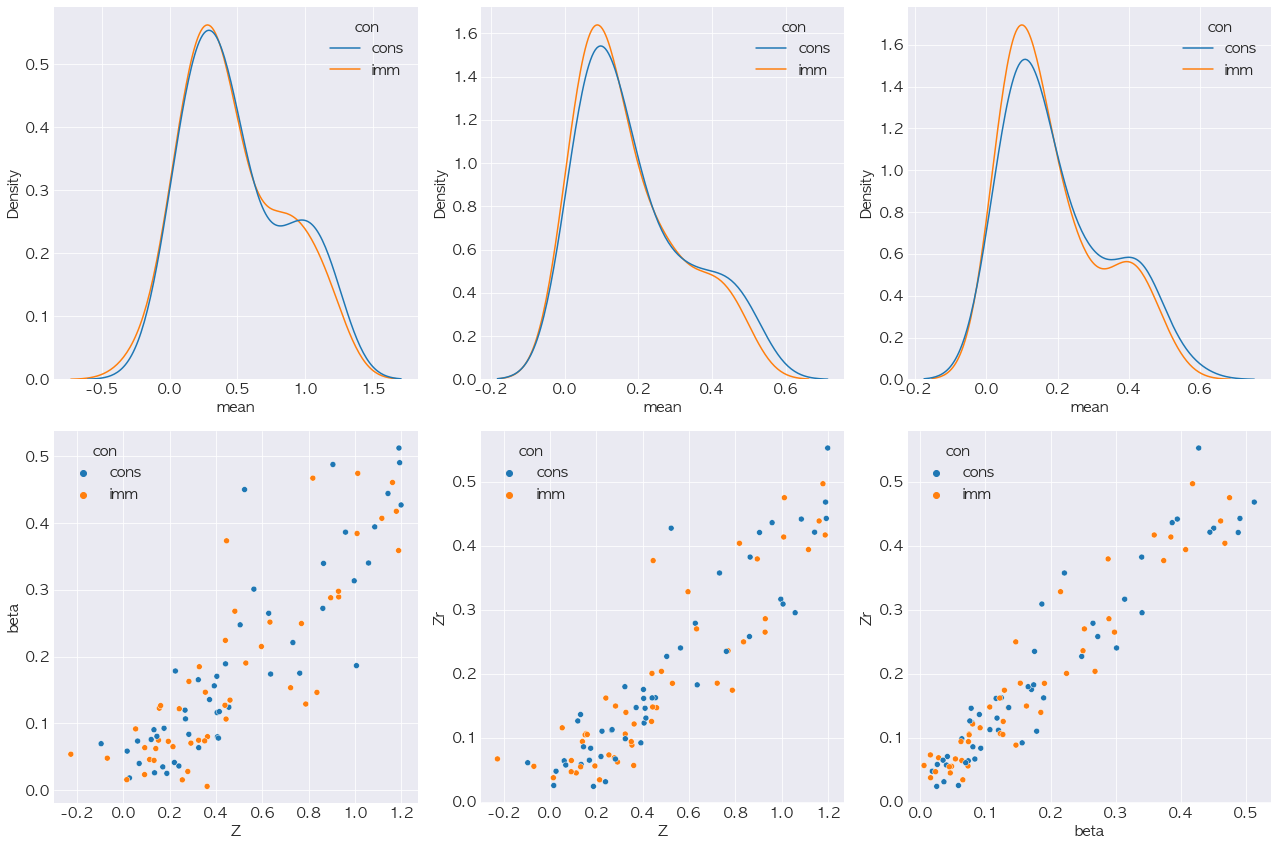

In [30]:

fig, axes = plt.subplots(nrows = 2, ncols=3, figsize=(18, 12))
sns.kdeplot(data=Z_long['Z'].reset_index(), x="mean", hue="con", ax=axes[0,0])
sns.kdeplot(data=beta_long['beta'].reset_index(), x="mean", hue="con", ax=axes[0,1])
sns.kdeplot(data=Zr_long['Zr'].reset_index(), x="mean", hue="con", ax=axes[0,2])
# sns.lmplot(data=df_all, x="Z", y="beta", hue="con", ax=axes[1,0])
# sns.lmplot(data=df_all, x="Z", y="Zr", hue="con", ax=axes[1,1])
# sns.lmplot(data=df_all, x="beta", y="Zr", hue="con", ax=axes[1,2])
sns.scatterplot(data=df_all, x="Z", y="beta", hue="con", ax=axes[1,0])
sns.scatterplot(data=df_all, x="Z", y="Zr", hue="con", ax=axes[1,1])
sns.scatterplot(data=df_all, x="beta", y="Zr", hue="con", ax=axes[1,2])
#sns.stripplot(data=df_all, x="con", y="Z", hue="con", ax=axes[2,0])
#sns.boxplot(data=df_all, x="con", y="Z", hue="con", dodge=False, ax=axes[2,0])
#sns.boxplot(data=df_all, x="con", y="beta", hue="con",dodge=False, ax=axes[2,1])
#sns.boxplot(data=df_all, x="con", y="Zr", hue="con", dodge=False,ax=axes[2,2])
plt.tight_layout()
plt.show()

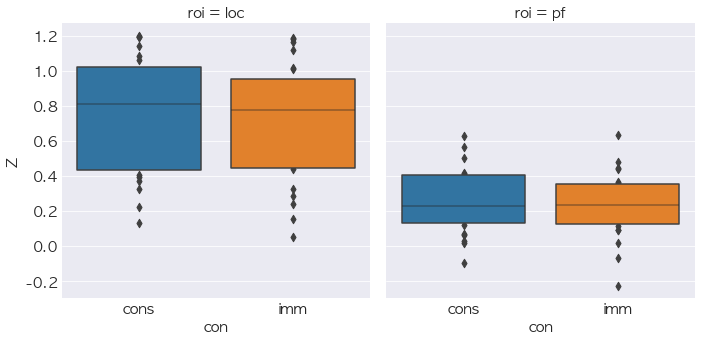

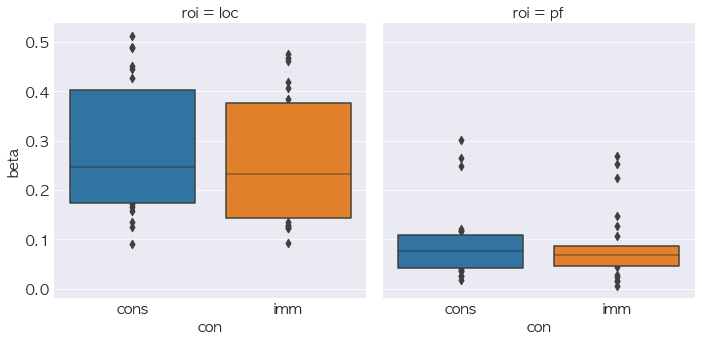

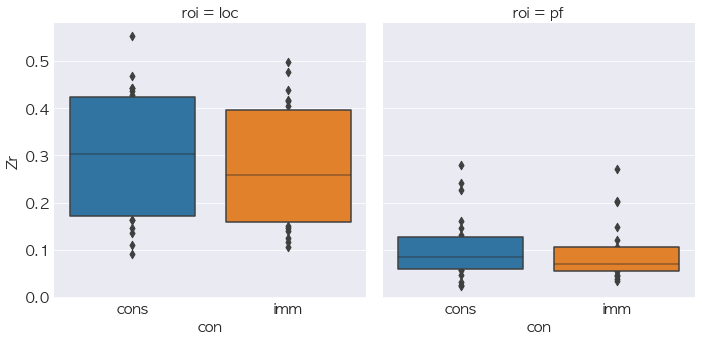

In [31]:
g1 = sns.catplot(data=df_all, x="con", y="Z", hue="con", col = "roi", kind='boxen', dodge=False)
g2 = sns.catplot(data=df_all, x="con", y="beta", hue="con", col = "roi", kind='boxen', dodge=False)
g3 = sns.catplot(data=df_all, x="con", y="Zr", hue="con", col = "roi", kind='boxen', dodge=False)
plt.tight_layout()
plt.show()

## Statistical Test - rmANOVA & Post-hoc

### Assumption Check

In [174]:
pg.homoscedasticity(data=Z_long.Z.reset_index(), dv='mean', group='con',
                   method='levene')

,W,pval,equal_var
levene,0.005552,0.940762,True


In [175]:
spher, W, chisq, dof, pval = pg.sphericity(data=Z_long.Z.reset_index(), dv='mean', 
              subject='sn', within=['roi','con'], method='mauchly')
print(spher, round(W, 3), round(chisq, 3), dof, round(pval, 3))

True nan nan 1 1.0


In [176]:
pg.normality(data=Z_long.Z.reset_index(), dv='mean', group='con',
            method='normaltest') # shapiro

,W,pval,normal
cons,5.957387,0.050859,True
imm,3.612369,0.164280,True


### Object-ness - Activation

In [32]:
aov = pg.rm_anova(dv='mean', within=['roi','con'],
                   subject='sn', data=Z_long.Z.reset_index(), detailed=True)
aov.round(3)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,roi,5.617,1,23,5.617,63.311,0.000,0.000,0.734,1.0
1,con,0.019,1,23,0.019,2.394,0.135,0.135,0.094,1.0
2,roi * con,0.004,1,23,0.004,3.051,0.094,0.094,0.117,1.0


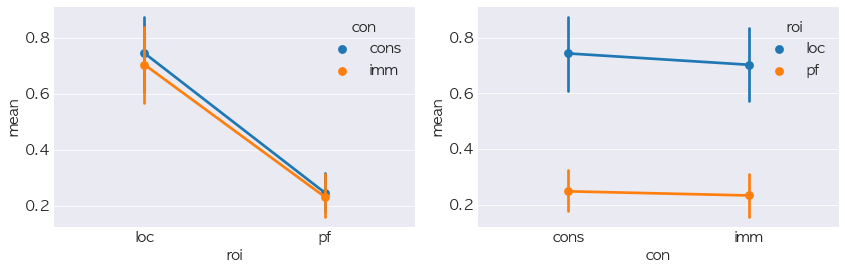

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
sns.pointplot(x="roi", y="mean", hue="con",
                    data=Z_long.Z.reset_index(), ax=axes[0])
sns.pointplot(x="con", y="mean", hue="roi",
                    data=Z_long.Z.reset_index(), ax=axes[1])
plt.tight_layout()
plt.show()

In [127]:
#targ_df = Z_long.Z.reset_index()
# loc_z = targ_df[targ_df['roi']=='loc'].pairwise_tukey(dv='mean', between='con').round(3)
# loc_z['roi'] = 'loc'
# pf_z =  targ_df[targ_df['roi']=='pf'].pairwise_tukey(dv='mean', between='con').round(3)
# pf_z['roi'] = 'pf'
# pd.concat([loc_z, pf_z], axis=0)

targ_df = Z_long.Z.reset_index()
loc_z = (targ_df[targ_df['roi']=='loc']
          .pairwise_ttests(dv='mean', within='con', subject='sn', 
                           parametric=True, padjust='bonf', effsize = 'cohen',
                           return_desc=True)
          .round(3))
loc_z['roi'] = 'loc'
pf_z = (targ_df[targ_df['roi']=='pf']
          .pairwise_ttests(dv='mean', within='con', subject='sn', 
                           parametric=True, padjust='bonf', effsize = 'cohen',
                           return_desc=True)
          .round(3))
pf_z['roi'] = 'pf'
print_table(pd.concat([loc_z, pf_z], axis=0)


POST HOC TESTS

Contrast    A     B      mean(A)    std(A)    mean(B)    std(B)  Paired    Parametric        T     dof  alternative      p-unc    BF10    cohen  roi
----------  ----  ---  ---------  --------  ---------  --------  --------  ------------  -----  ------  -------------  -------  ------  -------  -----
con         cons  imm      0.744     0.340      0.703     0.343  True      True          1.769  23.000  two-sided        0.090   0.824    0.119  loc
con         cons  imm      0.247     0.182      0.233     0.189  True      True          0.992  23.000  two-sided        0.332   0.334    0.080  pf



### Constituent Explainability - Beta

In [130]:
aov = pg.rm_anova(dv='mean', within=['roi','con'],
                   subject='sn', data=beta_long.beta.reset_index(), detailed=True)
aov.round(3)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,roi,0.803,1,23,0.803,58.053,0.000,0.000,0.716,1.0
1,con,0.006,1,23,0.006,8.372,0.008,0.008,0.267,1.0
2,roi * con,0.001,1,23,0.001,7.416,0.012,0.012,0.244,1.0


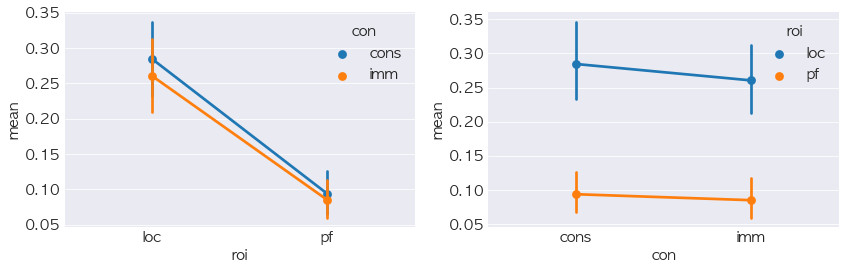

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
sns.pointplot(x="roi", y="mean", hue="con",
                    data=beta_long.beta.reset_index(), ax=axes[0])
sns.pointplot(x="con", y="mean", hue="roi",
                    data=beta_long.beta.reset_index(), ax=axes[1])
plt.tight_layout()
plt.show()

In [37]:
targ_df = beta_long.beta.reset_index()
loc_beta = (targ_df[targ_df['roi']=='loc']
          .pairwise_ttests(dv='mean', within='con', subject='sn', 
                           parametric=True, padjust='bonf', effsize = 'cohen',
                           return_desc=True)
          .round(3))
loc_beta['roi'] = 'loc'
pf_beta = (targ_df[targ_df['roi']=='pf']
          .pairwise_ttests(dv='mean', within='con', subject='sn', 
                           parametric=True, padjust='bonf', effsize = 'cohen',
                           return_desc=True)
          .round(3))
pf_beta['roi'] = 'pf'
pd.concat([loc_beta, pf_beta], axis=0)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen,roi
0,con,cons,imm,0.285,0.136,0.261,0.129,True,True,3.320,23.0,two-sided,0.003,13.554,0.181,loc
0,con,cons,imm,0.094,0.075,0.085,0.071,True,True,1.666,23.0,two-sided,0.109,0.714,0.119,pf


### Representational Similarity - Zr

In [38]:
aov = pg.rm_anova(dv='mean', within=['roi','con'],
                   subject='sn', data=Zr_long.Zr.reset_index(), detailed=True)
aov.round(3)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,roi,0.847,1,23,0.847,67.664,0.000,0.000,0.746,1.0
1,con,0.005,1,23,0.005,12.181,0.002,0.002,0.346,1.0
2,roi * con,0.001,1,23,0.001,3.134,0.090,0.090,0.120,1.0


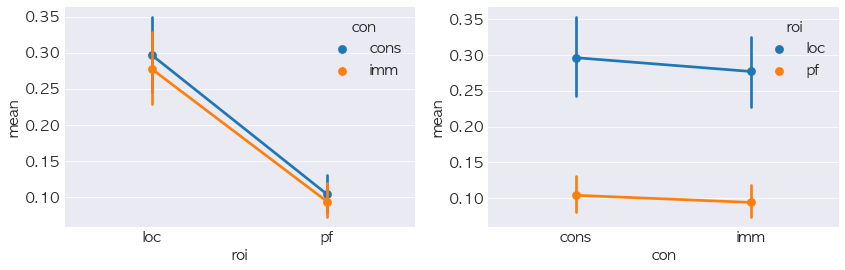

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
sns.pointplot(x="roi", y="mean", hue="con",
                    data=Zr_long.Zr.reset_index(), ax=axes[0])
sns.pointplot(x="con", y="mean", hue="roi",
                    data=Zr_long.Zr.reset_index(), ax=axes[1])
plt.tight_layout()
plt.show()

In [86]:
targ_df = Zr_long.Zr.reset_index()
loc_Zr = (targ_df[targ_df['roi']=='loc']
          .pairwise_ttests(dv='mean', within='con', subject='sn', 
                           parametric=True, padjust='bonf', effsize = 'cohen',
                           return_desc=True)
          .round(3))
loc_Zr['roi'] = 'loc'
pf_Zr = (targ_df[targ_df['roi']=='pf']
          .pairwise_ttests(dv='mean', within='con', subject='sn', 
                           parametric=True, padjust='bonf', effsize = 'cohen',
                           return_desc=True)
          .round(3))
pf_Zr['roi'] = 'pf'
pd.concat([loc_Zr, pf_Zr], axis=0)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen,roi
0,con,cons,imm,0.296,0.136,0.277,0.128,True,True,3.227,23.0,two-sided,0.004,11.202,0.146,loc
0,con,cons,imm,0.104,0.068,0.094,0.059,True,True,2.754,23.0,two-sided,0.011,4.367,0.158,pf


## Statistical Test - Correlation & Partial Corr

In [41]:
targ_df1 = Z_long.Z.reset_index()
z_df = (targ_df1
        .filter(['sn','roi','con','mean'])
        .rename(columns={'mean':'z'}))

targ_df2 = beta_long.beta.reset_index()
beta_df = (targ_df2
        .filter(['sn','roi','con','mean'])
        .rename(columns={'mean':'beta'}))

targ_df3 = Zr_long.Zr.reset_index()
Zr_df = (targ_df3
        .filter(['sn','roi','con','mean'])
        .rename(columns={'mean':'Zr'}))

df_fnl = pd.merge(z_df, beta_df, how='inner', on=['sn','roi','con'])
df_fnl = pd.merge(df_fnl, Zr_df, how='inner', on=['sn','roi','con'])

In [43]:
df_cons = df_fnl[(df_fnl['con'] == 'cons') & (df_fnl['roi']=='loc')]
df_imm = df_fnl[(df_fnl['con'] == 'imm')  & (df_fnl['roi']=='loc')]

In [51]:
df_dff = pd.merge(df_cons, df_imm, how='inner', on=['sn','roi'])

In [55]:
df_dff = (df_dff
         .assign(z = lambda x: x.z_x-x.z_y,
                beta = lambda x: x.beta_x-x.beta_y,
                Zr = lambda x: x.Zr_x-x.Zr_y)
         .filter(['sn','roi','z','beta','Zr']))

In [95]:
df_dff.head()

,sn,roi,z,beta,Zr
0,1,loc,0.190268,0.106183,0.062394
1,10,loc,-0.004985,-0.010664,0.015628
2,11,loc,0.136077,0.005941,0.029292
3,12,loc,0.079221,-0.001217,0.020856
4,13,loc,-0.035033,0.043352,0.050008


* Assumption Check

In [122]:
pg.multivariate_normality(df_dff[['z', 'beta', 'Zr']])

HZResults(hz=0.7703488985936779, pval=0.10968901247185164, normal=True)

### Activation & Beta

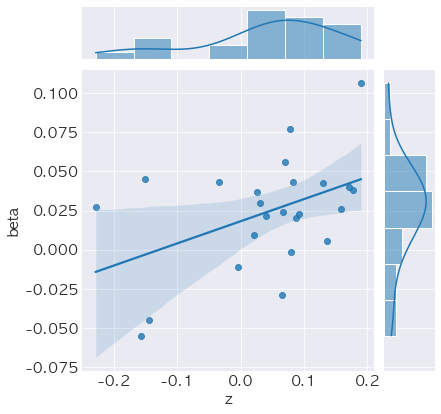

In [123]:
sns.jointplot(data=df_dff, x='z', y='beta', kind='reg')

* Pearson Correlation

In [89]:
pg.corr(df_dff.z, df_dff.beta,
        alternative="two-sided",
        method="pearson") # pearson, spearman, kendall, bicor, percbend, shepherd, skipped

,n,r,CI95%,p-val,BF10,power
pearson,24,0.448832,"[0.06, 0.72]",0.027807,2.489,0.615555


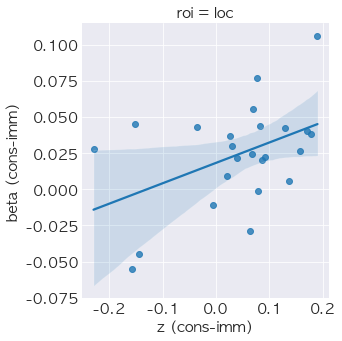

In [68]:
g = sns.lmplot(x="z", y="beta",
           col="roi", data=df_dff);
g = (g.set_axis_labels("z (cons-imm)", "beta (cons-imm)")
      #.set(xlim=(0, 60), ylim=(0, 12),
      #     xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))

* Patial Correlation

In [91]:
pg.partial_corr(data=df_dff, x='z', y='beta', covar='Zr',
               alternative='two-sided', method='pearson').round(3)

,n,r,CI95%,p-val
pearson,24,0.283,"[-0.15, 0.62]",0.191


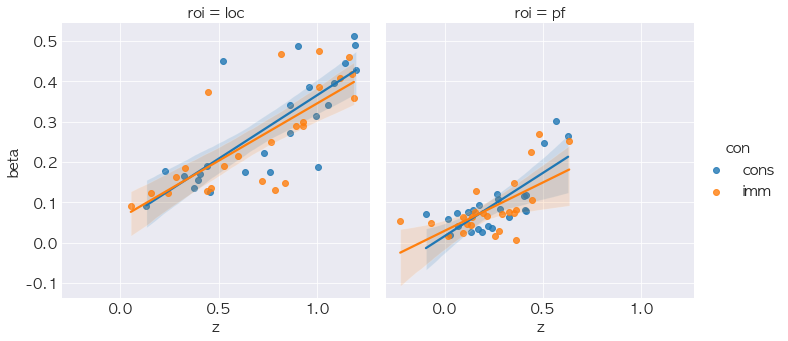

In [84]:
sns.lmplot(x="z", y="beta", hue="con",
           col="roi", data=df_fnl);

### Activation & Zr

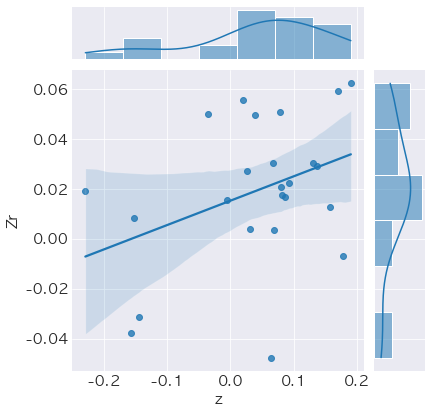

In [124]:
sns.jointplot(data=df_dff, x='z', y='Zr', kind='reg')

* Robust correlation (skipped method)

In [74]:
pg.corr(df_dff.z, df_dff.Zr,
        alternative="two-sided",
        method="skipped") # pearson, spearman, kendall, bicor, percbend, shepherd, skipped

,n,outliers,r,CI95%,p-val,power
skipped,24,1,0.307312,"[-0.12, 0.64]",0.153748,0.303899


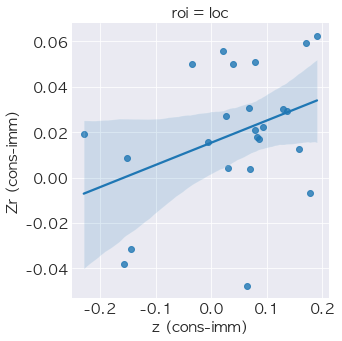

In [75]:
g = sns.lmplot(x="z", y="Zr",
           col="roi", data=df_dff);
g = (g.set_axis_labels("z (cons-imm)", "Zr (cons-imm)")
      #.set(xlim=(0, 60), ylim=(0, 12),
      #     xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))

* Patial Correlation

In [94]:
pg.partial_corr(data=df_dff, x='z', y='Zr', covar='beta',
               alternative='two-sided', method='pearson').round(3)

,n,r,CI95%,p-val
pearson,24,0.105,"[-0.32, 0.5]",0.632


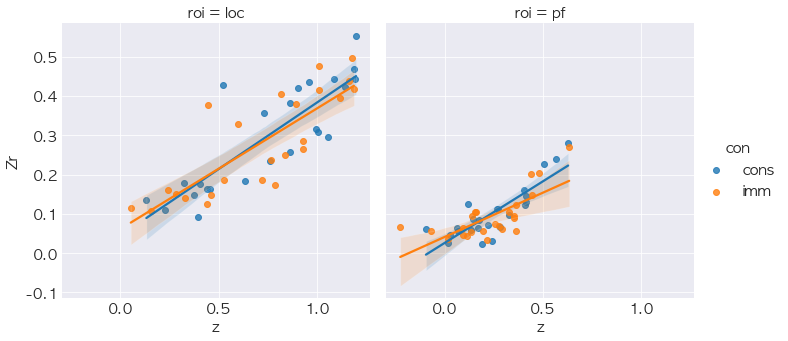

In [83]:
sns.lmplot(x="z", y="Zr", hue="con",
           col="roi", data=df_fnl);

### Beta & Zr

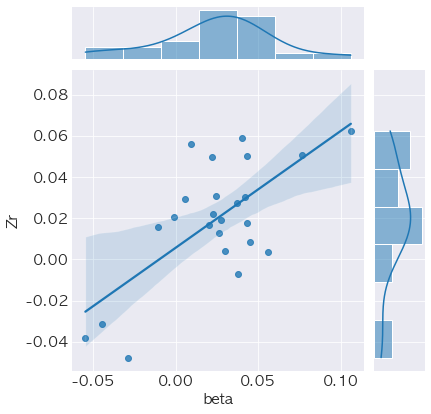

In [125]:
sns.jointplot(data=df_dff, x='beta', y='Zr', kind='reg')

* Spearman Correlation

In [81]:
pg.corr(df_dff.beta, df_dff.Zr,
        alternative="two-sided",
        method="spearman") # pearson, spearman, kendall, bicor, percbend, shepherd, skipped

,n,r,CI95%,p-val,power
spearman,24,0.381739,"[-0.03, 0.68]",0.065663,0.466299


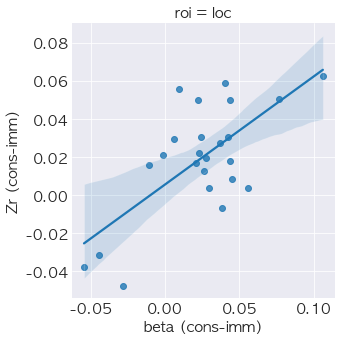

In [76]:
g = sns.lmplot(x="beta", y="Zr",
           col="roi", data=df_dff);
g = (g.set_axis_labels("beta (cons-imm)", "Zr (cons-imm)")
      #.set(xlim=(0, 60), ylim=(0, 12),
      #     xticks=[10, 30, 50], yticks=[2, 6, 10])
      .fig.subplots_adjust(wspace=.02))

* Patial Correlation

In [93]:
pg.partial_corr(data=df_dff, x='beta', y='Zr', covar='z',
               alternative='two-sided', method='pearson').round(3)

,n,r,CI95%,p-val
pearson,24,0.624,"[0.28, 0.82]",0.001


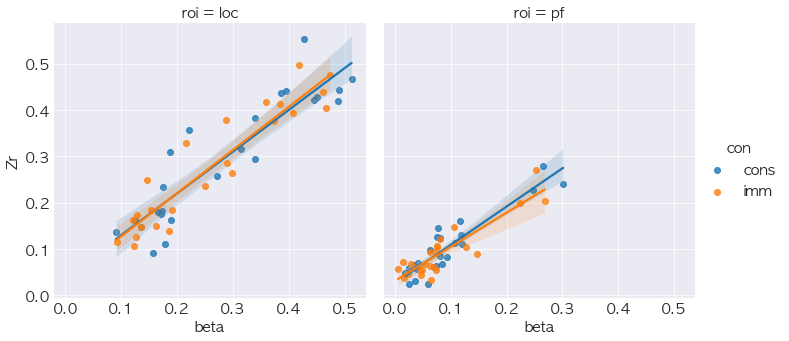

In [85]:
sns.lmplot(x="beta", y="Zr", hue="con",
           col="roi", data=df_fnl);

## Statistical Test - Regression & Mediation Analysis

In [170]:
df_fnl.head()

,sn,roi,con,z,beta,Zr
0,1,loc,cons,1.085557,0.394441,0.441953
1,1,loc,imm,0.895288,0.288257,0.379559
2,1,pf,cons,0.406269,0.079983,0.122856
3,1,pf,imm,0.324837,0.074869,0.105637
4,10,loc,cons,0.455391,0.124292,0.162410


In [171]:
lm = pg.linear_regression(X = df_dff[['z', 'Zr']],  y = df_dff['beta' ],
                         remove_na = True, add_intercept = True,
                         coef_only = False, relimp=True)
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,0.007,0.006,1.111,0.279,0.512,0.466,-0.006,0.020,NaN,NaN
1,z,0.070,0.052,1.352,0.191,0.512,0.466,-0.038,0.177,0.122,23.81
2,Zr,0.728,0.199,3.658,0.001,0.512,0.466,0.314,1.141,0.390,76.19


In [172]:
lm.residuals_, lm.df_model_, lm.df_resid_ 

(array([ 0.04037782, -0.02880129, -0.03199547, -0.02904239,  0.00230377,
        -0.00496017, -0.03976243,  0.02242275,  0.02731909, -0.02331989,
         0.01746612,  0.04105124, -0.00992838,  0.00840776, -0.02203583,
        -0.00706285, -0.00563117,  0.0176607 ,  0.0234147 ,  0.00406036,
        -0.01894301,  0.04231559, -0.0242374 , -0.00107959]),
 2,
 21)

In [173]:
pg.mediation_analysis(data=df_dff, x='z', m='Zr', y='beta', alpha=0.05,
                   seed=42)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Zr ~ X,0.097763,0.051329,0.069984,-0.008687,0.204213,No
1,Y ~ Zr,0.828695,0.187705,0.000219,0.439419,1.217971,Yes
2,Total,0.141011,0.059856,0.027807,0.016877,0.265145,Yes
3,Direct,0.069888,0.051678,0.190637,-0.037582,0.177358,No
4,Indirect,0.071123,0.047993,0.064000,0.002036,0.183404,No


In [178]:
# 모듈 불러오기
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [225]:
linear_model = smf.ols(formula='beta ~ z + Zr + C(con)', data=df_fnl).fit()

In [226]:
linear_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.904    
Dependent Variable: beta             AIC:                -326.3848
Date:               2021-11-28 15:50 BIC:                -316.1274
No. Observations:   96               Log-Likelihood:     167.19   
Df Model:           3                F-statistic:        300.5    
Df Residuals:       92               Prob (F-statistic): 2.14e-47 
R-squared:          0.907            Scale:              0.0018762
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
Intercept       -0.0026    0.0090  -0.2923  0.7708  -0.0204  0.0152
C(con)[T.imm]   -0.0023    0.0089  -0.2653  0.7914  -0.0199  0.0152
z                0.0045    0.0283   0.1596  0.8736  -0.0517  0.0608
Zr               0.9472    0.0741  12.7876  0.0000   0.8001  1.0943
------------------------------------------------------------------
Omnibus:              1.899         Durbin-Watson:           1.028
Prob(Omnibus):        0.387         Jarque-Bera (JB):        1.381
Skew:                 -0.272        Prob(JB):                0.501
Kurtosis:             3.222         Condition No.:           22   
==================================================================

"""

In [227]:
NDF = pd.DataFrame()
NDF['fitted'] = linear_model.fittedvalues  
NDF['resid'] = linear_model.resid
NDF['stdresid'] = linear_model.resid_pearson

In [228]:
NDF.head()

,fitted,resid,stdresid
0,0.420898,-0.026457,-0.610800
1,0.358590,-0.070332,-1.623721
2,0.115582,-0.035600,-0.821867
3,0.096556,-0.021687,-0.500668
4,0.153270,-0.028978,-0.668998


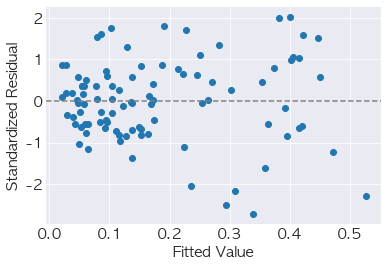

In [229]:
plt.plot(NDF.fitted, NDF.stdresid, 'o')
plt.axhline(y = 0, color ='grey', linestyle='dashed')
plt.xlabel('Fitted Value')
plt.ylabel('Standardized Residual')
plt.show()

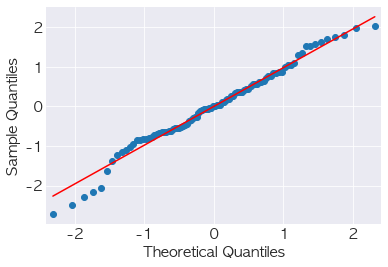

In [230]:
sm.qqplot(NDF.stdresid, line='s')
plt.show()

In [238]:
df_fnl_logReg = df_fnl
df_fnl_logReg['con'] = df_fnl_logReg['con'].replace(['cons','imm'], ['1','0'])
df_fnl_logReg['con'] = df_fnl_logReg['con'].astype(int)

In [245]:
logreg = pg.logistic_regression(df_fnl_logReg[['z', 'beta', 'Zr']], df_fnl_logReg['con'],
                             remove_na=True, coef_only=False)

In [246]:
logreg

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-0.135120,0.352751,-0.383048,0.701684,-0.826499,0.556258
1,z,-0.286458,1.312846,-0.218196,0.827277,-2.859589,2.286674
2,beta,1.307065,4.827110,0.270776,0.786563,-8.153896,10.768026
3,Zr,0.190483,5.712118,0.033347,0.973398,-11.005062,11.386028


In [248]:
logreg['coef'][0]

-0.1351203794008318

In [255]:
# log-odd ratio of intercept = -0.135120 / logreg['coef'][0]
# log-odd ratio of z = -0.286457 / logreg['coef'][1]
# log-odd ratio of beta = 1.307065 / logreg['coef'][2]
# log-odd ratio of Zr = 0.190483 / logreg['coef'][3]

# odd ratio of intercept = np.exp(logreg['coef'][0])
# odd ratio of z = np.exp(logreg['coef'][1])
# odd ratio of beta = np.exp(logreg['coef'][2])
# odd ratio of Zr = np.exp(logreg['coef'][3])
np.exp(logreg['coef'][0])
np.exp(logreg['coef'][1])
np.exp(logreg['coef'][2])
np.exp(logreg['coef'][3])

# probability
1/(1+np.exp(-(-logreg['coef'][0])))
1/(1+np.exp(-(-logreg['coef'][0]+1*logreg['coef'][1])))
1/(1+np.exp(-(-logreg['coef'][0]+1*logreg['coef'][2])))
1/(1+np.exp(-(-logreg['coef'][0]+1*logreg['coef'][3])))

0.5806892448602095